<a href="https://colab.research.google.com/github/ShilpaPF/ADS1-Assignment2/blob/main/21063938_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

loading annotations into memory...
Done (t=0.52s)
creating index...
index created!
loading annotations into memory...
Done (t=0.61s)
creating index...
index created!
Visualizing annotations for images in the training set:


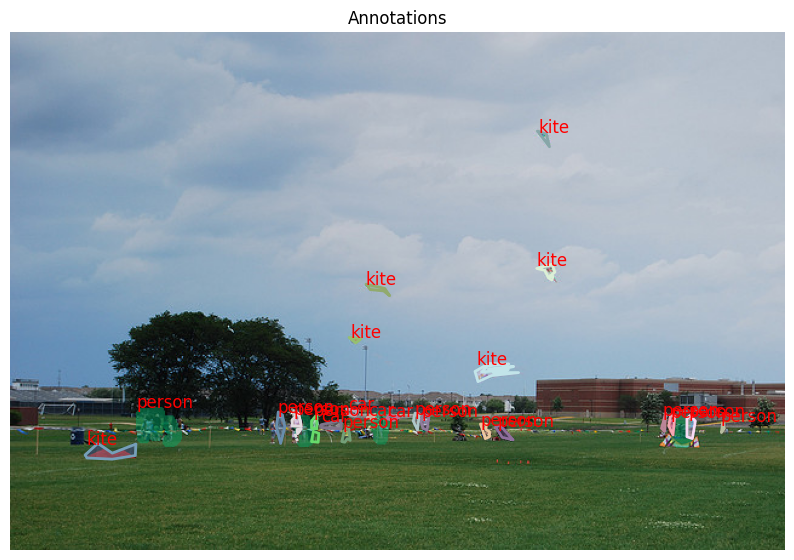

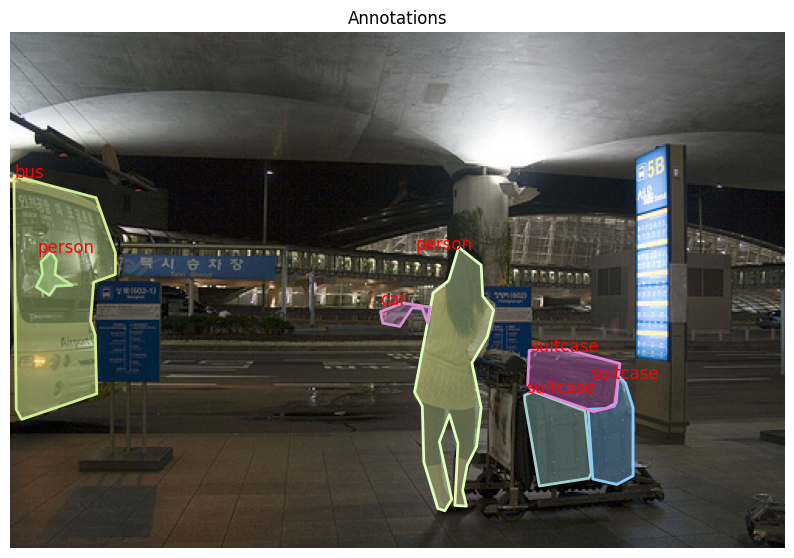

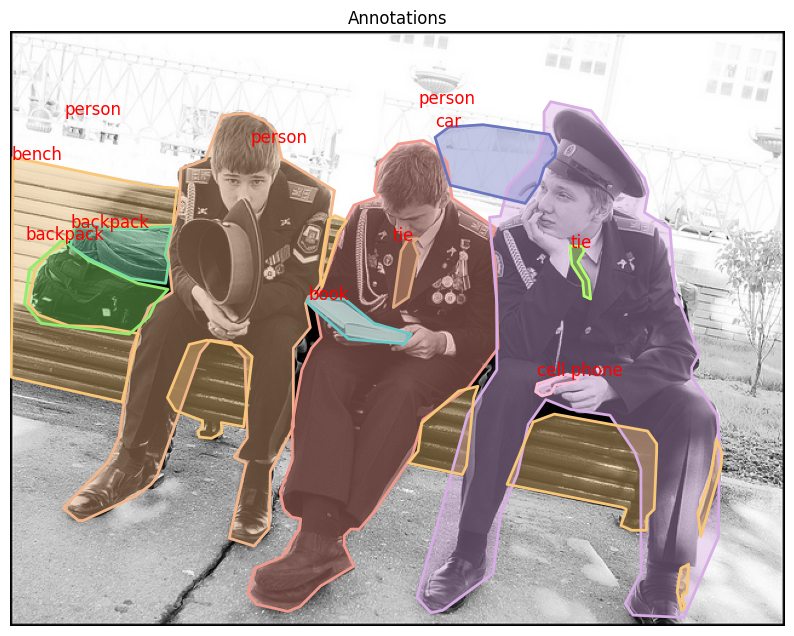

Visualizing annotations for images in the validation set:


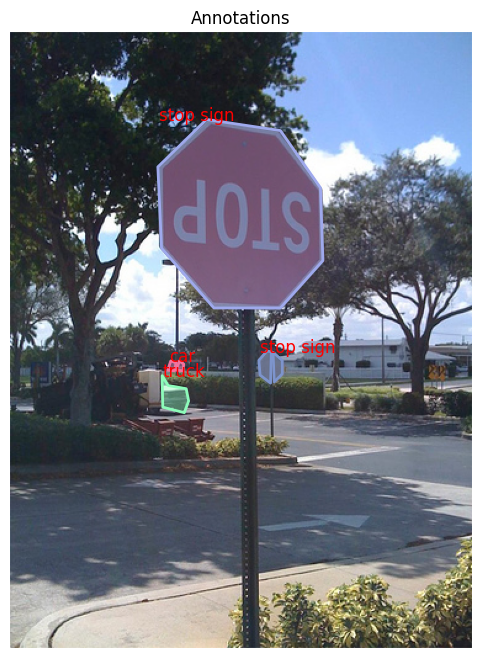

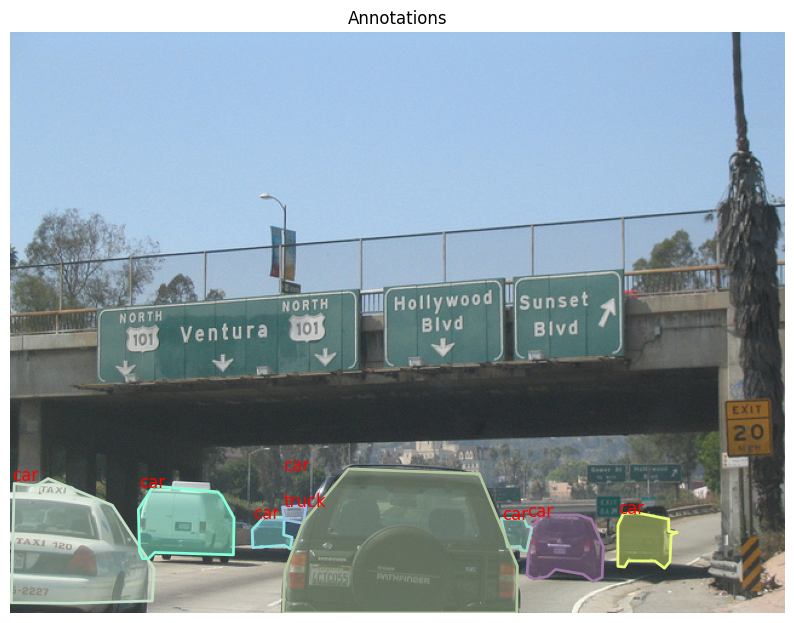

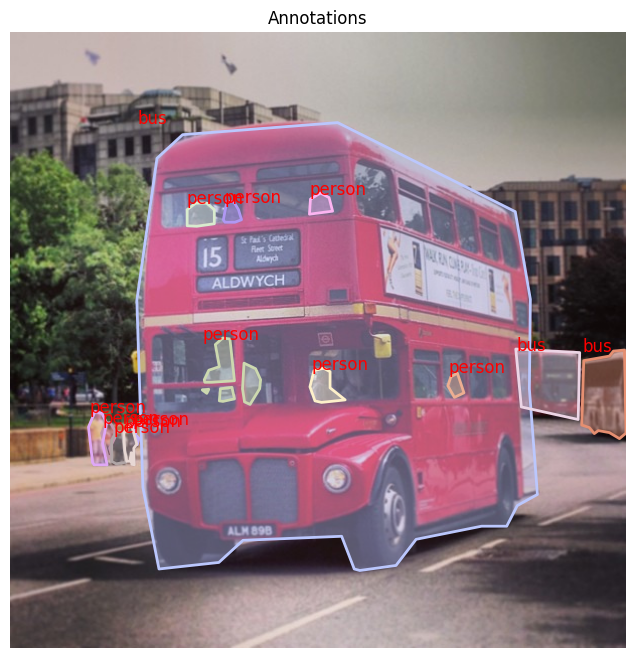

In [ ]:
from pycocotools.coco import COCO
import os
import matplotlib.pyplot as plt

# Defining the train and validation paths
train_path = '/content/drive/MyDrive/RESEARCH METHODS/RM_Segmentation_Assignment_dataset/train-300'
validation_path = '/content/drive/MyDrive/RESEARCH METHODS/RM_Segmentation_Assignment_dataset/validation-300'

# Loading COCO Annotations
def load_annotations(annotations_file):
    coco = COCO(annotations_file)
    return coco

# Function to visualize annotations for an image
def visualize_annotations(coco, img_id, folder, save_folder):
    # Loading image info
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(folder, 'data', img_info['file_name'])
    img = plt.imread(img_path)

    # Loading annotations
    annot_ids = coco.getAnnIds(imgIds=img_id)
    annotations = coco.loadAnns(annot_ids)

    # Plotting image with annotations
    plt.figure(figsize=(10,8))
    plt.imshow(img)
    plt.axis('off')
    coco.showAnns(annotations)

    # Display category IDs and category names
    for ann in annotations:
        category_name = coco.loadCats(ann['category_id'])[0]['name']
        x, y, _, _ = ann['bbox']
        plt.text(x, y, f"{category_name}", fontsize=12, color='red')

    plt.title('Annotations')
    plt.show()

    # Saving visualization
    save_path = os.path.join(save_folder, f'annotation_{img_id}.png')
    plt.savefig(save_path)
    plt.close()

# Loading COCO annotations
train_annot_file = os.path.join(train_path, 'labels.json')
validation_annot_file = os.path.join(validation_path, 'labels.json')

# Check if files exist before loading
if os.path.exists(train_annot_file) and os.path.exists(validation_annot_file):
    train_coco = load_annotations(train_annot_file)
    validation_coco = load_annotations(validation_annot_file)

    # Get image IDs for the three images
    train_img_ids = train_coco.getImgIds()[:3]
    valid_img_ids = validation_coco.getImgIds()[:3]

    # Visualizing annotations for the images in the training set
    print("Visualizing annotations for images in the training set:")
    for img_id in train_img_ids:
        visualize_annotations(train_coco, img_id, train_path, '/content/drive/MyDrive/RESEARCH METHODS/RM_Segmentation_Assignment_dataset/train-300')

    # Visualizing annotations for the images in the validation set
    print("Visualizing annotations for images in the validation set:")
    for img_id in valid_img_ids:
        visualize_annotations(validation_coco, img_id, validation_path, '/content/drive/MyDrive/RESEARCH METHODS/RM_Segmentation_Assignment_dataset/validation-300')
else:
    print("One or both of the annotation files do not exist.")




